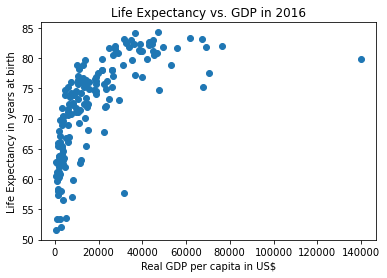

In [272]:
import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np
import statistics 

## What year to extract the data from  
year = 2016

# Read the csv-file with GDP and extract the data for the chosen year
gdp_df = pd.read_csv("./datasets/gdp.csv")
gdp_df = gdp_df.loc[gdp_df["Year"] == year]

# Read the csv-file with Life Expectancy and extract the data for the chosen year
life_df = pd.read_csv("./datasets/life.csv")
life_df = life_df.loc[life_df["Year"] == year]

# Filter the dataframes to only contain the same contries 
life_df = life_df[life_df["Entity"].isin(gdp_df["Entity"])]
gdp_df = gdp_df[gdp_df["Entity"].isin(life_df["Entity"])]

# Extract all the GDP values into the varible xValues
xValues = gdp_df["Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))"]
# Extract all the Life Expectancy values into the variable yValues
yValues = life_df["Life expectancy"]

# Set up the pyplot as a scatterplot and map the lists xValues and yValues to respective axises
testFig, ax = pyplot.subplots()

ax.scatter(xValues, yValues)
# Set up labels and title for the plot
pyplot.xlabel('Real GDP per capita in US$')
pyplot.ylabel('Life Expectancy in years at birth')
pyplot.title("Life Expectancy vs. GDP in 2016")
# Set a variable fig to point to the current figure (the scatter plot)
fig = pyplot.gcf()

# Draw and show the plot
pyplot.draw()
pyplot.show()
# Save the current figure into a png image with the name scatterplot
fig.savefig("scatterplot")


In [203]:
import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np
import statistics 

import scipy.stats as sc

gdp_code = "Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))"
life_code = 'Life expectancy'

## What year to extract the data from  
year = 2016

# Read the csv-file with GDP and extract the data for the chosen year
gdp_df = pd.read_csv("./datasets/gdp.csv")
gdp_df = gdp_df.loc[gdp_df["Year"] == year]

# Read the csv-file with Life Expectancy and extract the data for the chosen year
life_df = pd.read_csv("./datasets/life.csv")
life_df = life_df.loc[life_df["Year"] == year]

# Filter the dataframes to only contain the same contries 
life_df = life_df[life_df["Entity"].isin(gdp_df["Entity"])]
gdp_df = gdp_df[gdp_df["Entity"].isin(life_df["Entity"])]

# Extract all the Life Expectancy values into the variable yValues
yValues = life_df["Life expectancy"]
#  Extract all the GDP values into the variable xValues
xValues = gdp_df["Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))"]

# The standard deviation of the life expectancy dataset
standard_deviation = statistics.stdev(yValues)
# The mean of the life expectancy dataset
mean = np.sum(yValues)/len(yValues)

# The mean of the GDP dataset
mean_gdp = np.sum(xValues)/len(xValues)
# The standard deviation of GDP
stdev_gdp = statistics.stdev(xValues)


life_df_high = life_df.loc[life_df["Life expectancy"] >= mean + standard_deviation]

# Generate table of high life expectancy
life_df_high[["Entity", "Life expectancy"]].to_csv("table.csv")


life_df = life_df[['Entity', 'Life expectancy']]
gdp_df = gdp_df[['Entity', 'Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))']]
together = gdp_df.set_index('Entity').join(life_df.set_index('Entity'))
together = together.loc[together['Life expectancy'] > mean + standard_deviation/2]
together = together.loc[together['Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))'] < mean_gdp]
together.sort_values(life_code, ascending=False).to_csv("lowgdphighlife.csv")


In [245]:
import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np
import statistics 

# Read the csv file for happiness, co2 emissions per capita and no of people without access to clean water
co2_df = pd.read_csv("./datasets/co2percapita.csv")
happiness_df = pd.read_csv("./datasets/happiness.csv")
gdp_df = pd.read_csv("./datasets/gdp.csv")
life_df = pd.read_csv("./datasets/life.csv")

# Set the key for every column
year = 2014
happ_code = "Life satisfaction in Cantril Ladder (World Happiness Report 2019)"
co2_code = "Per capita CO2 emissions"
life_df = life_df.loc[life_df["Year"] == year]

# Trim for one year only
co2_df = co2_df.loc[co2_df['Year'] == year]
happiness_df = happiness_df.loc[happiness_df['Year'] == year]
gdp_df = gdp_df.loc[gdp_df["Year"] == year]

# Trim for interesting columns
co2_df = co2_df[['Entity', co2_code]]
happiness_df = happiness_df[['Entity', happ_code]]





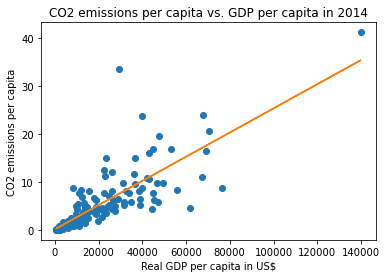

In [273]:

# Join co2 emission dataframe with gdp dataframe on entitiy
co2_gdp = co2_df.set_index('Entity').join(gdp_df.set_index('Entity'))

co2_gdp.dropna(inplace=True)

# Get gdp and co2 from joined dataframe and set to x and y values
xValues = co2_gdp[gdp_code]
yValues = co2_gdp[co2_code]

# Plot the arrays
pyplot.plot(xValues, yValues, 'o')

# Make a linear fit to the data
m, b = np.polyfit(xValues, yValues, 1)

# Plot the line
pyplot.plot(xValues, m*xValues + b)


# Set up labels and title for the plot
pyplot.xlabel('Real GDP per capita in US$')
pyplot.ylabel('CO2 emissions per capita')
pyplot.title("CO2 emissions per capita vs. GDP per capita in 2014")
# Set a variable fig to point to the current figure (the scatter plot)
fig = pyplot.gcf()

# Draw and show the plot
pyplot.draw()
pyplot.show()
# Save the current figure into a png image with the name scatterplot
fig.savefig("scatterplotco2gdp")

In [274]:
# Get the values to calculate mean and standard deviation from
gdp_values = gdp_df[gdp_code]
co2_values = co2_df[co2_code]

# Calculate the mean
mean_gdp = np.sum(gdp_values)/len(gdp_values)
mean_co2 = np.sum(co2_values)/len(co2_values)

# Calculate standard deviation
stdev_gdp = statistics.stdev(gdp_values)
stdev_co2 = statistics.stdev(co2_values)



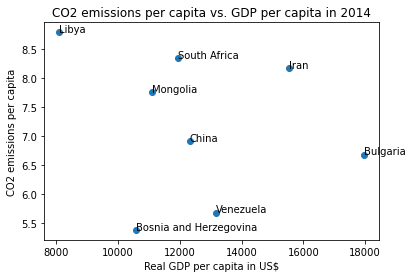

In [275]:

# Get dataframe with low GDP and high CO2
gdp_low_df = gdp_df.loc[gdp_df[gdp_code] < mean_gdp] 
co2_high_df = co2_df.loc[co2_df[co2_code] > mean_co2]

# Join dataframes
together = gdp_low_df.join(co2_high_df.set_index('Entity'), on='Entity')
# Delete NaN entries
together.dropna(inplace=True)

# Get the countries
labels = together['Entity']

# Get gdp and co2 from joined dataframe and set to x and y values
xValues = together[gdp_code].values.tolist()
yValues = together[co2_code].values.tolist()


fig, ax = pyplot.subplots()

# Make a scatterplot of the values
ax.scatter(xValues, yValues)

# Set the labels of every data point
for i, txt in enumerate(labels):
    ax.annotate(txt, (xValues[i], yValues[i]))


# Set up labels and title for the plot
pyplot.xlabel('Real GDP per capita in US$')
pyplot.ylabel('CO2 emissions per capita')
pyplot.title("CO2 emissions per capita vs. GDP per capita in 2014")

# Set a variable fig to point to the current figure (the scatter plot)
fig = pyplot.gcf()

# Draw and show the plot
pyplot.draw()
pyplot.show()
# Save the current figure into a png image with the name scatterplot
fig.savefig("scatterplothighco2lowgdp")


15578         Sweden
15745    Switzerland
Name: Entity, dtype: object


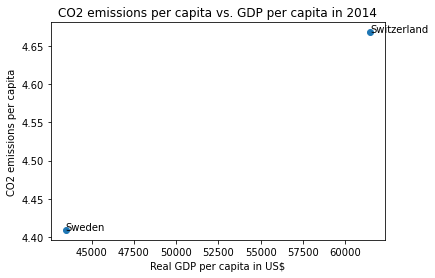

In [240]:
# Get the dataframe for high gdp and low CO2. Also, delete Qatar
gdp_high_df = gdp_df.loc[gdp_df[gdp_code] > mean_gdp + stdev_gdp]
gdp_high_df = gdp_high_df.loc[gdp_high_df[gdp_code] < 139000]
co2_low_df = co2_df.loc[co2_df[co2_code] < mean_co2]

# Join co2 emission dataframe with gdp dataframe on entitiy
co2_gdp = co2_low_df.set_index('Entity').join(gdp_high_df.set_index('Entity'))

gdp_high_df = gdp_high_df[gdp_high_df["Entity"].isin(co2_low_df["Entity"])]
co2_low_df = co2_low_df[co2_low_df["Entity"].isin(gdp_high_df["Entity"])]

labels = gdp_high_df['Entity']

co2_gdp.dropna(inplace=True)

# Get gdp and co2 from joined dataframe and set to x and y values
xValues = co2_gdp[gdp_code]
yValues = co2_gdp[co2_code]

m, b = np.polyfit(xValues, yValues, 1)

fig, ax = pyplot.subplots()

ax.scatter(xValues, yValues)

for i, txt in enumerate(labels):
    ax.annotate(txt, (xValues[i], yValues[i]))


# Set up the pyplot as a scatterplot and map the lists xValues and yValues to respective axises

# Set up labels and title for the plot
pyplot.xlabel('Real GDP per capita in US$')
pyplot.ylabel('CO2 emissions per capita')
pyplot.title("CO2 emissions per capita vs. GDP per capita in 2014")
# Set a variable fig to point to the current figure (the scatter plot)
fig = pyplot.gcf()

# Draw and show the plot
pyplot.draw()
pyplot.show()
# Save the current figure into a png image with the name scatterplot
fig.savefig("scatterplotlowco2highgdp")

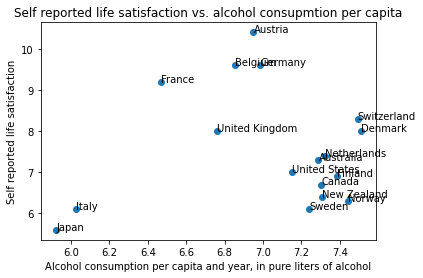

In [120]:
# Join alcohol consumption dataframe with happiness dataframe on entitiy
alcohol_happ_df = alcohol_df.set_index('Entity').join(happiness_df.set_index('Entity'))

# Get alcohol and happiness from joined dataframe and set to x and y values
xValues =  alcohol_happ_df[happ_code].values.tolist()
yValues = alcohol_happ_df[alc_code].values.tolist()
labels = alcohol_df['Entity'].values.tolist()

# Set up the pyplot as a scatterplot and map the lists xValues and yValues to respective axises
fig, ax = pyplot.subplots()

ax.scatter(xValues, yValues)

for i, txt in enumerate(labels):
    ax.annotate(txt, (xValues[i], yValues[i]))

# Set up labels and title for the plot
pyplot.xlabel('Alcohol consumption per capita and year, in pure liters of alcohol')
pyplot.ylabel('Self reported life satisfaction')
pyplot.title("Self reported life satisfaction vs. alcohol consupmtion per capita")
# Set a variable fig to point to the current figure (the scatter plot)
fig = pyplot.gcf()

# Draw and show the plot
pyplot.draw()
pyplot.show()
# Save the current figure into a png image with the name scatterplot
fig.savefig("scatterplotalcoholhappiness")



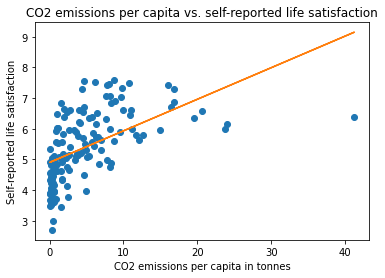

In [271]:

happiness_co2 = happiness_df.set_index('Entity').join(co2_df.set_index('Entity'))

happiness_co2.dropna(inplace=True)

xValues = happiness_co2[co2_code]
yValues = happiness_co2[happ_code]

pyplot.plot(xValues, yValues, 'o')

m, b = np.polyfit(xValues, yValues, 1)

pyplot.plot(xValues, m*xValues + b)

# Set up labels and title for the plot
pyplot.xlabel('CO2 emissions per capita in tonnes')
pyplot.ylabel('Self-reported life satisfaction')
pyplot.title("CO2 emissions per capita vs. self-reported life satisfaction")
# Set a variable fig to point to the current figure (the scatter plot)
fig = pyplot.gcf()

# Draw and show the plot
pyplot.draw()
pyplot.show()
# Save the current figure into a png image with the name scatterplot
fig.savefig("scatterplothappinessco2")

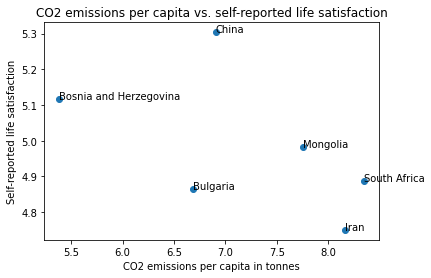

In [276]:
happ_values = happiness_df[happ_code]

# The mean of the GDP dataset
mean_happ = np.sum(happ_values)/len(happ_values
)
# The standard deviation of GDP
stdev_happ = statistics.stdev(happ_values)

co2_high_df = co2_df.loc[co2_df[co2_code] > mean_co2]
happ_low_df = happiness_df.loc[happiness_df[happ_code] < mean_happ]


together = co2_high_df.join(happ_low_df.set_index('Entity'), on='Entity')
together.dropna(inplace=True)
labels = together['Entity']

# Get gdp and co2 from joined dataframe and set to x and y values
yValues = together[happ_code].values.tolist()
xValues = together[co2_code].values.tolist()

#pyplot.plot(xValues, yValues, 'o')

m, b = np.polyfit(xValues, yValues, 1)

#pyplot.plot(xValues, m*xValues + b)

fig, ax = pyplot.subplots()

ax.scatter(xValues, yValues)

for i, txt in enumerate(labels):
    ax.annotate(txt, (xValues[i], yValues[i]))


# Set up the pyplot as a scatterplot and map the lists xValues and yValues to respective axises

# Set up labels and title for the plot
pyplot.xlabel('CO2 emissions per capita in tonnes')
pyplot.ylabel('Self-reported life satisfaction')
pyplot.title("CO2 emissions per capita vs. self-reported life satisfaction")
# Set a variable fig to point to the current figure (the scatter plot)
fig = pyplot.gcf()

# Draw and show the plot
pyplot.draw()
pyplot.show()
# Save the current figure into a png image with the name scatterplot
fig.savefig("scatterplotlowhapphighco2")


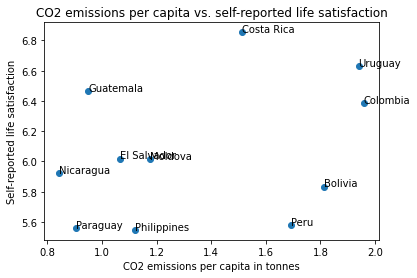

In [268]:
co2_high_df = co2_df.loc[co2_df[co2_code] < mean_co2 - stdev_co2/2]
happ_low_df = happiness_df.loc[happiness_df[happ_code] > mean_happ]


together = co2_high_df.join(happ_low_df.set_index('Entity'), on='Entity')
together.dropna(inplace=True)
labels = together['Entity']
#print(together)

# Get gdp and co2 from joined dataframe and set to x and y values
yValues = together[happ_code].values.tolist()
xValues = together[co2_code].values.tolist()

#pyplot.plot(xValues, yValues, 'o')

m, b = np.polyfit(xValues, yValues, 1)

#pyplot.plot(xValues, m*xValues + b)

fig, ax = pyplot.subplots()

ax.scatter(xValues, yValues)

for i, txt in enumerate(labels):
    ax.annotate(txt, (xValues[i], yValues[i]))


# Set up the pyplot as a scatterplot and map the lists xValues and yValues to respective axises

# Set up labels and title for the plot
pyplot.xlabel('CO2 emissions per capita in tonnes')
pyplot.ylabel('Self-reported life satisfaction')
pyplot.title("CO2 emissions per capita vs. self-reported life satisfaction")
# Set a variable fig to point to the current figure (the scatter plot)
fig = pyplot.gcf()

# Draw and show the plot
pyplot.draw()
pyplot.show()
# Save the current figure into a png image with the name scatterplot
fig.savefig("scatterplothighhapplowco2")